In [1]:
!pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable


In [2]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
from sklearn.preprocessing import StandardScaler # data normalization
from imblearn.over_sampling import SMOTE
from numpy import where
import itertools # construct specialized tools
from matplotlib import rcParams # plot size customization

In [3]:
# Check version number
import imblearn
from imblearn.over_sampling import RandomOverSampler
print(imblearn.__version__)

0.11.0


In [4]:
# Importing and cleaning the data
train_data = pd.read_csv('DBS.csv', sep=';')
test_data = pd.read_csv('DBS_2020.csv', sep=';')
train_data.head()

,access,tests,tests_grade,exam,project,project_grade,assignments,result_points,result_grade,graduate,year,acad_year
0,1256,57.00,A,19,91.54,A,40.0,189.92,A,1,2019,2019/2020
1,985,42.87,B,19,75.96,A,13.7,189.43,A,1,2017,2017/2018
2,1455,54.50,A,16,96.79,A,40.0,188.91,A,1,2019,2019/2020
3,998,54.50,A,16,93.36,A,40.0,186.85,A,1,2019,2019/2020
4,1347,55.00,A,16,92.86,A,39.0,186.38,A,1,2019,2019/2020


In [5]:
X_train = np.asarray(train_data[['access', 'tests', 'assignments']])
y_train = np.asarray(train_data['graduate'])

In [6]:
X_test = np.asarray(test_data[['access', 'tests', 'assignments']])
y_test = np.asarray(test_data['graduate'])

In [7]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [8]:
standardizer = StandardScaler()

In [9]:
# Transform the dataset
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [10]:
# Summarize the new class distribution
counter = Counter(y_train)
print(counter)

Counter({1: 210, 0: 210})


In [11]:
# Modelling
from sklearn.svm import SVC
svclassifier = SVC(C=1.0, kernel='linear', degree=3, gamma='auto',probability=True)
svclassifier.fit(X_train, y_train)

SVC(gamma='auto', kernel='linear', probability=True)

In [12]:
#Evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)
scores = cross_val_score(svclassifier, X_test, y_test, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.979


In [13]:
# Predictions
yhat = svclassifier.predict(X_test)

In [14]:
# Predictions
yhat_prob = svclassifier.predict_proba(X_test)

In [15]:
# Classificaton report
from sklearn.metrics import classification_report
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.96      0.96      0.96        46

    accuracy                           0.93        60
   macro avg       0.91      0.91      0.91        60
weighted avg       0.93      0.93      0.93        60



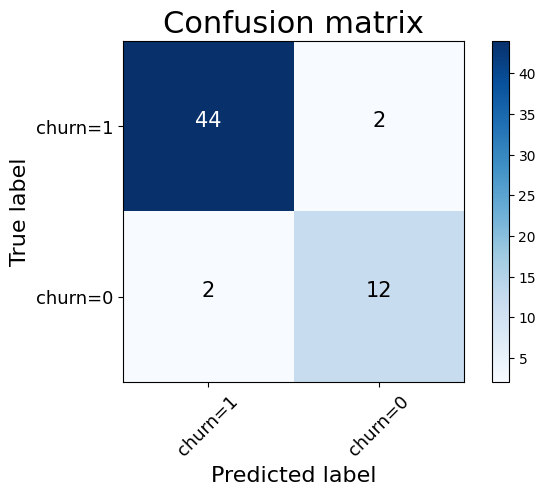

In [16]:
# Confusion matrix
from sklearn.metrics import confusion_matrix # evaluation metric
def plot_confusion_matrix(cm, classes,normalize = False, title = 'Confusion matrix', cmap = plt.cm.Blues):
    
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title, fontsize = 22)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45, fontsize = 13)
    plt.yticks(tick_marks, classes, fontsize = 13)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 fontsize = 15,
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label', fontsize = 16)
    plt.xlabel('Predicted label', fontsize = 16)

# Compute confusion matrix

cnf_matrix = confusion_matrix(y_test, yhat, labels = [1,0])
np.set_printoptions(precision = 2)


# Plot non-normalized confusion matrix

plt.figure()
plot_confusion_matrix(cnf_matrix, classes = ['churn=1','churn=0'], normalize = False,  title = 'Confusion matrix')
plt.savefig('confusion_matrix.png')

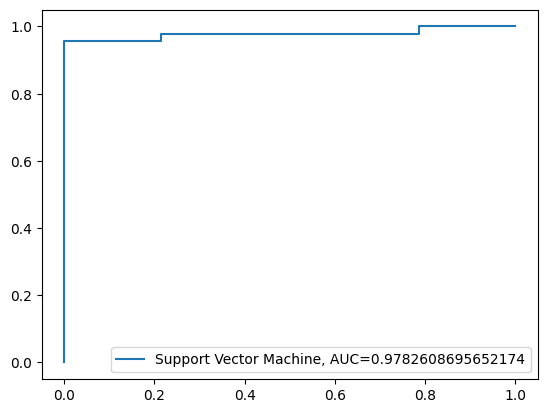

In [17]:
# Import the metrics class
from sklearn import metrics
y_pred_proba = svclassifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Support Vector Machine, AUC="+str(auc))
plt.legend(loc=4)
plt.show()

In [18]:
# Importing packages
import numpy as np
from numpy import where
from numpy import mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

%matplotlib inline
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Random (chance) Prediction: AUROC = 0.500
XGBoost: AUROC = 0.978


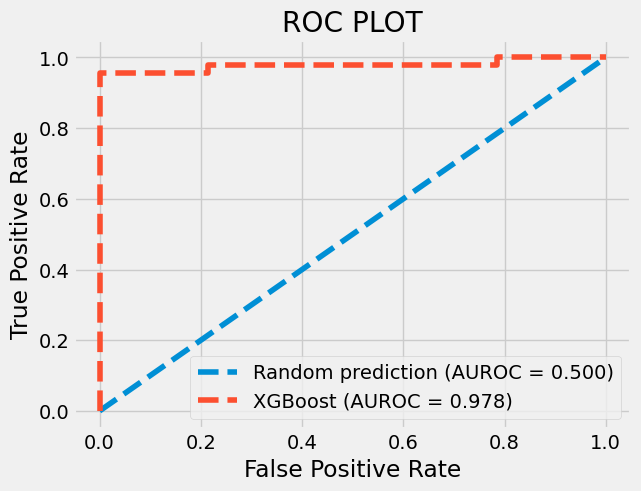

In [19]:
from sklearn.metrics import roc_curve, roc_auc_score
r_probs = [0 for _ in range(len(y_test))]
prob_y_12 = svclassifier.predict_proba(X_test)

# keep probabilities for the positive outcome only
prob_y_12 = [p[1] for p in prob_y_12]

r_auc = roc_auc_score(y_test, r_probs)
auc1 = roc_auc_score(y_test, prob_y_12)

print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('XGBoost: AUROC = %.3f' % (auc1))

r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
prob_y_12_fpr, prob_y_12_tpr, _ = roc_curve(y_test, prob_y_12)
import matplotlib.pyplot as plt
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(prob_y_12_fpr, prob_y_12_tpr, linestyle='--', label='XGBoost (AUROC = %0.3f)' % auc1)


# Title
plt.title('ROC PLOT')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()